In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2


(x_train, y_train), (x_test, y_test)=cifar10.load_data()

x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

x_train, x_val, y_train, y_val=train_test_split(x_train, y_train, test_size=0.2, random_state=0)

row,column,layer=x_train.shape[1:]

model=Sequential()

model.add(Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(row,column,layer), kernel_regularizer=l1_l2(0.0001, 0.0001)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3,3), activation="relu", padding="same", kernel_regularizer=l1_l2(0.0001, 0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation="relu", padding="same", kernel_regularizer=l1_l2(0.0001, 0.0001)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), activation="relu", padding="same", kernel_regularizer=l1_l2(0.0001, 0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation="relu", padding="same", kernel_regularizer=l1_l2(0.0001, 0.0001)))
model.add(BatchNormalization())


model.add(Conv2D(128, (3,3), activation="relu", padding="same", kernel_regularizer=l1_l2(0.0001, 0.0001)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.35))

model.add(Flatten())

model.add(Dense(512, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation="softmax"))

model.compile(Adam(0.001), loss="categorical_crossentropy", metrics=["accuracy"])

output=model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))

model.save("/content/drive/MyDrive/Models/cifar10.h5")



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.3749 - loss: 2.7887 - val_accuracy: 0.6301 - val_loss: 1.7818
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6207 - loss: 1.7662 - val_accuracy: 0.6403 - val_loss: 1.6184
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6709 - loss: 1.5030 - val_accuracy: 0.7108 - val_loss: 1.3912
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7076 - loss: 1.4062 - val_accuracy: 0.5986 - val_loss: 1.8403
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7207 - loss: 1.3819 - val_accuracy: 0.7460 - val_loss: 1.3098
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7341 - loss: 1.3612 - val_accuracy: 0.6536 - val_loss: 1.5985
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7483 - loss: 1.3369 - val_accuracy: 0.7195 - val_loss: 1.4357
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7664 - loss

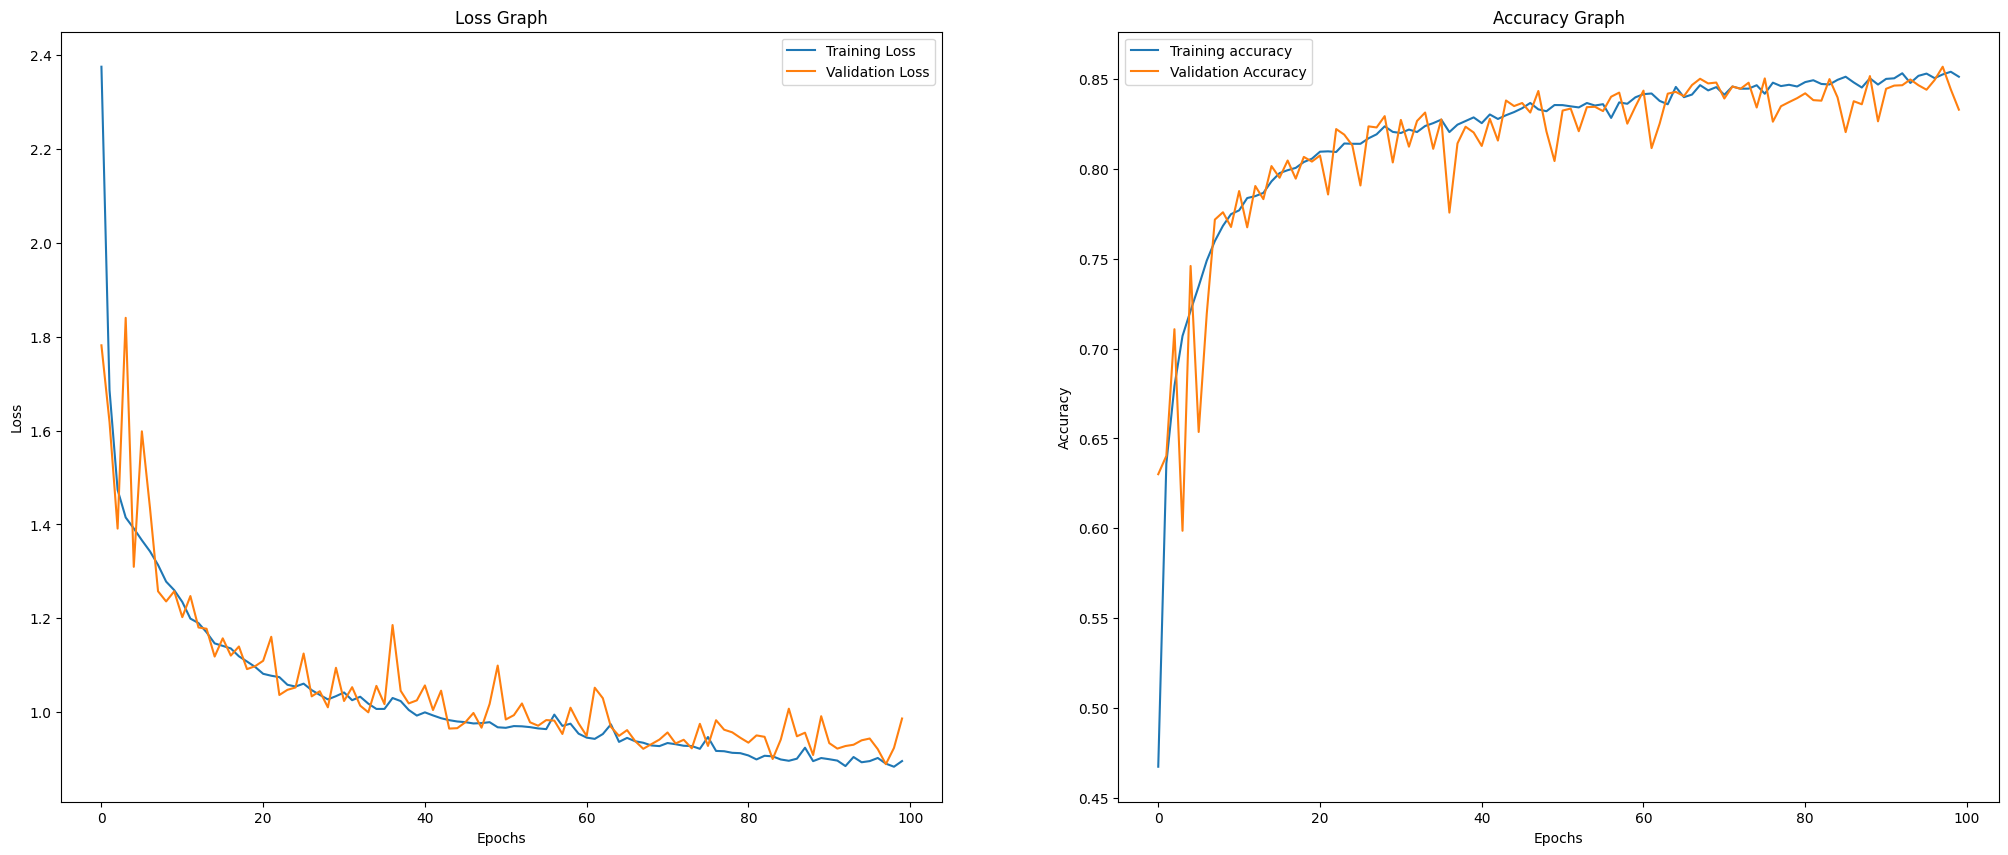

In [4]:
from tensorflow.keras.models import load_model

model=load_model("/content/drive/MyDrive/Models/cifar10.h5")

fig,ax=plt.subplots(1,2, figsize=(25,10))

ax[0].plot(output.history["loss"], label="Training Loss")
ax[0].plot(output.history["val_loss"], label="Validation Loss")
ax[0].set_title("Loss Graph")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()


ax[1].plot(output.history["accuracy"], label="Training accuracy")
ax[1].plot(output.history["val_accuracy"], label="Validation Accuracy")
ax[1].set_title("Accuracy Graph")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


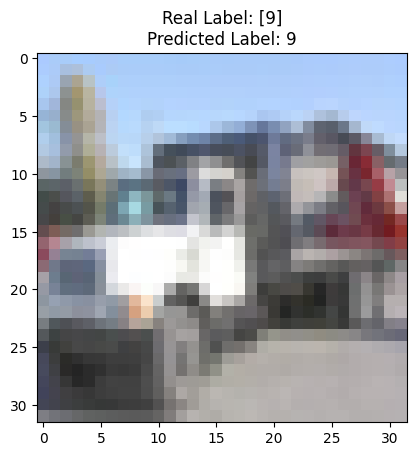

In [8]:
model=load_model("/content/drive/MyDrive/Models/cifar10.h5")

(x_train, y_train), (x_test, y_test)=cifar10.load_data()

x_test=x_test.astype("float32")/255

tahmin=model.predict(x_test)

i=45
plt.imshow(x_test[i])
plt.title("Real Label: {}\nPredicted Label: {}".format(y_test[i], np.argmax(tahmin[i])))
plt.show()